# Global Solutions – 4º Semestre 2024  Dynamic Programming

**Integrantes:**


*   RM552202 - Juan Pinheiro
*   RM558303 - Bruno Eduardo Caputo Paulino

**Neste Projeto será observado o desenvolvimento de ferramentas para predição economica de energia simuladas, essas predicões serão feitas de quatro formas diferentes, para maior variedade e teste de qualidade e eficiência.**

## imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Configuracão inicial do projeto(onde estão as informacões das energias simuladas)

In [2]:
# Energia 1
initial_cost1 = 50000         # Custo inicial (em reais)
maintenance_cost1 = 2000      # Custo anual de manutenção (em reais)
tariff1 = 0.20                # Tarifa por unidade de energia (em reais)
inflation_rate1 = 3.0         # Taxa de inflação anual média (em %)

# Energia 2
initial_cost2 = 60000         # Custo inicial (em reais)
maintenance_cost2 = 1500      # Custo anual de manutenção (em reais)
tariff2 = 0.15                # Tarifa por unidade de energia (em reais)
inflation_rate2 = 2.5         # Taxa de inflação anual média (em %)

# Parâmetros gerais
years_to_predict = [10, 20, 30]  # Horizontes temporais a serem analisados
n_simulations = 1000            # Número de simulações para Monte Carlo

## Monte Carlo

In [3]:
#crição de uma função resposavel pelo monte carlo
def monte_carlo_simulation(initial_cost, maintenance_cost, tariff, inflation_rate, years, n_simulations):
    scenarios = np.zeros((n_simulations, years))  # Armazena custos para cada simulação

    for sim in range(n_simulations):
        total_cost = initial_cost  # Começa com o custo inicial
        for year in range(years):
            # Gera variações nos fatores de custo
            inflation_factor = np.random.normal(inflation_rate, 0.5)  # Variação da inflação
            maintenance_factor = np.random.normal(1, 0.05)  # Variação de manutenção
            tariff_factor = np.random.normal(1, 0.05)  # Variação da tarifa

            # Calcula o custo anual ajustado
            annual_cost = maintenance_cost * maintenance_factor + tariff * tariff_factor
            total_cost += annual_cost * (1 + inflation_factor / 100)
            scenarios[sim, year] = total_cost  # Armazena o custo acumulado

    return scenarios


In [4]:
#Guardando resultados do monte carlo em variaveis, utilizando-se da função
# Simulação para Fonte 1
costs_source1_10 = monte_carlo_simulation(initial_cost1, maintenance_cost1, tariff1, inflation_rate1, 10, n_simulations)
costs_source1_20 = monte_carlo_simulation(initial_cost1, maintenance_cost1, tariff1, inflation_rate1, 20, n_simulations)
costs_source1_30 = monte_carlo_simulation(initial_cost1, maintenance_cost1, tariff1, inflation_rate1, 30, n_simulations)

# Simulação para Fonte 2
costs_source2_10 = monte_carlo_simulation(initial_cost2, maintenance_cost2, tariff2, inflation_rate2, 10, n_simulations)
costs_source2_20 = monte_carlo_simulation(initial_cost2, maintenance_cost2, tariff2, inflation_rate2, 20, n_simulations)
costs_source2_30 = monte_carlo_simulation(initial_cost2, maintenance_cost2, tariff2, inflation_rate2, 30, n_simulations)

In [7]:
#Fazendo a media dos resultado para criação de graficos e analises
mean1_10 = np.mean(costs_source1_10, axis=0)
mean1_20 = np.mean(costs_source1_20, axis=0)
mean1_30 = np.mean(costs_source1_30, axis=0)

mean2_10 = np.mean(costs_source2_10, axis=0)
mean2_20 = np.mean(costs_source2_20, axis=0)
mean2_30 = np.mean(costs_source2_30, axis=0)

In [8]:
#Criando uma função para esboçar grafico dos resultados
def plot_accumulated_separate(mean1, mean2, years, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, years + 1), mean1, label="Fonte 1 - Valor Acumulado", color='blue')
    plt.plot(range(1, years + 1), mean2, label="Fonte 2 - Valor Acumulado", color='green')
    plt.title(title)
    plt.xlabel("Anos")
    plt.ylabel("Custo Acumulado (R$)")
    plt.legend()
    plt.grid(True)
    plt.show()

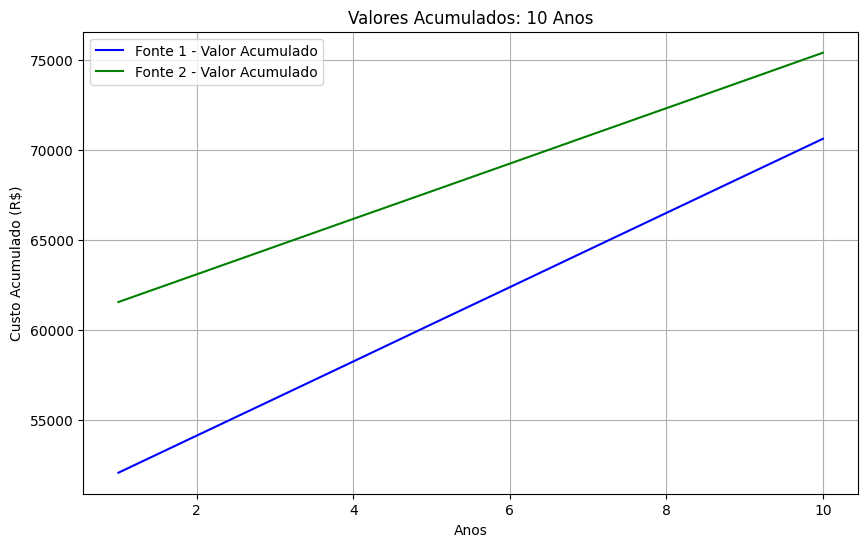

In [10]:
#esboçando graficos 10 anos
plot_accumulated_separate(mean1_10, mean2_10, 10, "Valores Acumulados: 10 Anos")

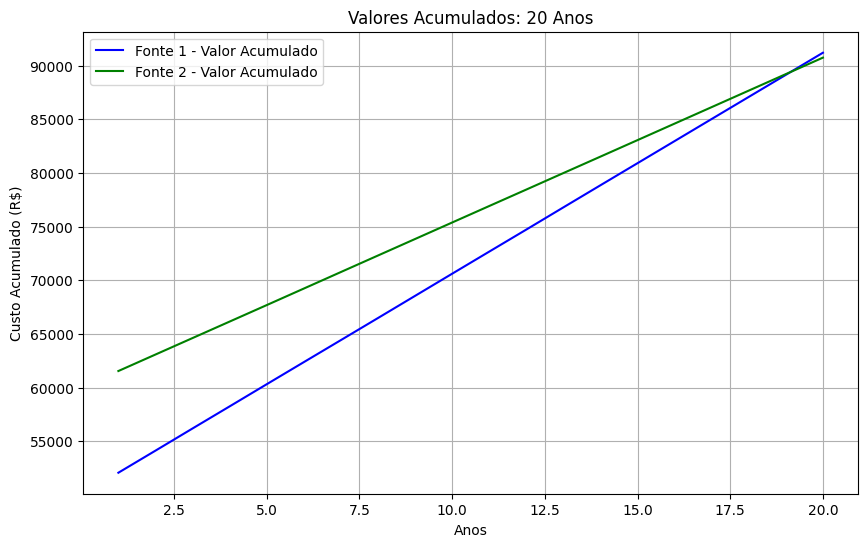

In [11]:
#20 anos
plot_accumulated_separate(mean1_20, mean2_20, 20, "Valores Acumulados: 20 Anos")

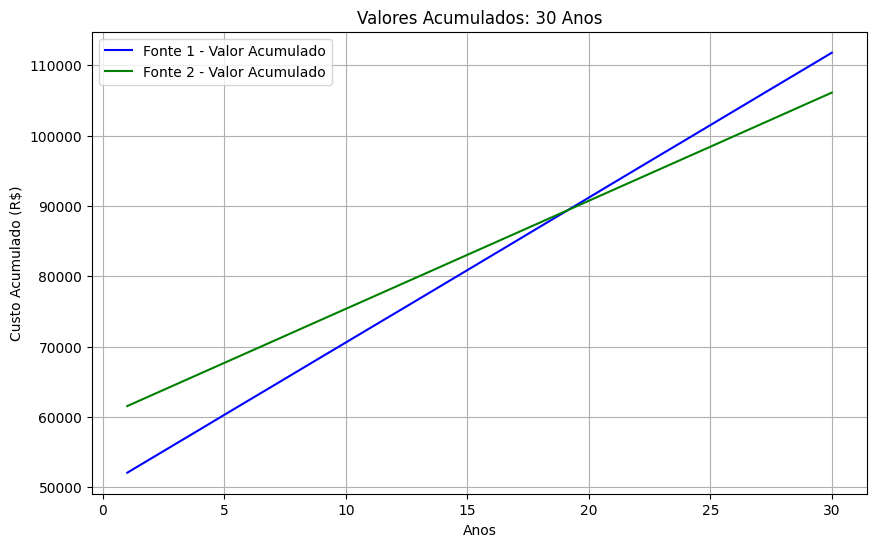

In [12]:
#30 anos
plot_accumulated_separate(mean1_30, mean2_30, 30, "Valores Acumulados: 30 Anos")

## Dividir para conquistar

In [16]:
#Criação da função dividir para conquistar
def divide_comparison(mean1, mean2):
    # Definindo os períodos (em anos)
    periods = [(0, 10), (10, 20), (20, 30)]

    comparison_results = {}

    # Avaliando cada período
    for i, (start, end) in enumerate(periods, 1):
        # Calculando o custo total para cada fonte no período
        total1 = np.sum(mean1[start:end])
        total2 = np.sum(mean2[start:end])

        # Comparando qual fonte é mais vantajosa
        if total1 < total2:
            best_source = "Fonte 1"
        else:
            best_source = "Fonte 2"

        comparison_results[f"Período {i} ({start+1}-{end})"] = {
            "Custo Total Fonte 1": total1,
            "Custo Total Fonte 2": total2,
            "Fonte Mais Viável": best_source
        }

    return comparison_results

In [18]:
# Custos simulados para Fonte 1 e Fonte 2 ao longo de 10, 20 e 30 anos
np.random.seed(42)

# Custos médios simulados para cada período (10, 20, 30 anos)
costs_source1_10 = np.random.normal(60000, 5000, 10)
costs_source1_20 = np.random.normal(80000, 7000, 20)
costs_source1_30 = np.random.normal(100000, 10000, 30)

costs_source2_10 = np.random.normal(65000, 5500, 10)
costs_source2_20 = np.random.normal(85000, 7500, 20)
costs_source2_30 = np.random.normal(105000, 11000, 30)

# Combinação dos custos de cada período
mean1_combined = np.concatenate([costs_source1_10, costs_source1_20[10:], costs_source1_30[20:]])
mean2_combined = np.concatenate([costs_source2_10, costs_source2_20[10:], costs_source2_30[20:]])

In [19]:
# Executando a análise
results = divide_comparison(mean1_combined, mean2_combined)

# Exibindo os resultados
for period, data in results.items():
    print(f"{period}:")
    for key, value in data.items():
        print(f"  {key}: {value}")
    print()


Período 1 (1-10):
  Custo Total Fonte 1: 622403.0555849378
  Custo Total Fonte 2: 649171.8654681788
  Fonte Mais Viável: Fonte 1

Período 2 (11-20):
  Custo Total Fonte 1: 784470.9504731381
  Custo Total Fonte 2: 857608.5574027934
  Fonte Mais Viável: Fonte 1

Período 3 (21-30):
  Custo Total Fonte 1: 1019944.142785776
  Custo Total Fonte 2: 1065166.136140183
  Fonte Mais Viável: Fonte 1



Neste caso observado utilizando-se do dividir para conquistar a energia 1 saiu-se melhor em todos os periodos

## Memoização

In [24]:
#Criação da função memoização
def memoization_comparison(start, end, cost, cache):

    # start: O início do período (ano inicial).
    # end: O fim do período (ano final).
    # cost: Lista de custo anuais para a fonte de energia.
    # cache: Dicionário que armazena os resultados já calculados.

    # Verifica se o resultado para o período já está no cache
    if (start, end) in cache:
        return cache[(start, end)]

    # Caso o resultado não esteja no cache, calcula os cost
    total_cost = sum(cost[start:end])

    # Armazena o resultado no cache
    cache[(start, end)] = total_cost

    return total_cost

In [25]:
# Inicializando o cache
cache_source1 = {}
cache_source2 = {}

# Cálculos de custo para Fonte 1 com Memoization
costs2_source1_10 = memoization_comparison(0, 10, costs_source1_10, cache_source1)
costs2_source1_20 = memoization_comparison(0, 20, costs_source1_20, cache_source1)
costs2_source1_30 = memoization_comparison(0, 30, costs_source1_30, cache_source1)

# Cálculos de custo para Fonte 2 com Memoization
costs2_source2_10  = memoization_comparison(0, 10, costs_source2_10, cache_source2)
costs2_source2_20  = memoization_comparison(0, 20, costs_source2_20, cache_source2)
costs2_source2_30  = memoization_comparison(0, 30, costs_source2_30, cache_source2)

# Exibindo os resultados
print(f'Custo Fonte 1 (10 anos): {costs2_source1_10}')
print(f'Custo Fonte 1 (20 anos): {costs2_source1_20}')
print(f'Custo Fonte 1 (30 anos): {costs2_source1_30}')

print(f'Custo Fonte 2 (10 anos): {costs2_source2_20 }')
print(f'Custo Fonte 2 (20 anos): {costs2_source2_20 }')
print(f'Custo Fonte 2 (30 anos): {costs2_source2_30 }')

Custo Fonte 1 (10 anos): 622403.0555849378
Custo Fonte 1 (20 anos): 1529124.8740523695
Custo Fonte 1 (30 anos): 2963651.2589130173
Custo Fonte 2 (10 anos): 1704028.3481678246
Custo Fonte 2 (20 anos): 1704028.3481678246
Custo Fonte 2 (30 anos): 3143316.9632367864


In [26]:
#Iniciando teste para ver velocidade sem memoização
start_time = time.time()
# Calculando os custos sem memoization para Fonte 1
costs2_source1_10_no = sum(costs_source1_10[:10])
costs2_source1_20_no = sum(costs_source1_20[:20])
costs2_source1_30_no = sum(costs_source1_30[:30])

# Calculando os custos sem memoization para Fonte 2
costs2_source2_10_sum = sum(costs_source2_10[:10])
costs2_source2_20_sum = sum(costs_source2_20[:20])
costs2_source2_30_sum = sum(costs_source2_30[:30])

end_time = time.time()

print(f"Tempo sem memoization: {end_time - start_time:.6f} segundos")

Tempo sem memoization: 0.000550 segundos


In [27]:
#Iniciando teste para ver velocidade com memoização
start_time = time.time()
# Calculando os custos com memoization para Fonte 1
costs2_source1_10_yes = memoization_comparison(0, 10, costs_source1_10, cache_source1)
costs2_source1_20_yes = memoization_comparison(0, 20, costs_source1_20, cache_source1)
costs2_source1_30_yes = memoization_comparison(0, 30, costs_source1_30, cache_source1)

# Calculando os custos com memoization para Fonte 2
costs2_source2_10_yes = memoization_comparison(0, 10, costs_source2_10, cache_source2)
costs2_source2_20_yes = memoization_comparison(0, 20, costs_source2_20, cache_source2)
costs2_source2_30_yes = memoization_comparison(0, 30, costs_source2_30, cache_source2)

end_time = time.time()

print(f"Tempo com memoization: {end_time - start_time:.6f} segundos")


Tempo com memoization: 0.000374 segundos


Existe uma diminuição de tempo perceptivel entre os, com o metodo de moização o tempo mais rapido, possivelmente em proporções maiores, esta diferença tende a crescer ainda mais, com a diferença atual sendo de 32% na velocidade

## Função Recursiva

In [29]:
#Criação da função recursiva
def evaluate_tariff_recursive(initial_tariff, increment_rate, current_year, time_horizon, total_cost=0, viability_limit=100000):

    #initial_tariff: valor inicial da tarifa.
    #increment_rate: O aumento anual em porcentagem
    #current_year: O ano atual.
    #time_horizon: Numero de anos a serem simulados.
    #total_cost: custo total, inicia-se 0.
    #viability_limit: Custo maximo aceitavel.

    # Caso base: se o horizonte temporal terminar ou o custo total exceder o limite de viabilidade
    if current_year > time_horizon or total_cost > viability_limit:
        return current_year, total_cost

    # Calcular o custo para o ano atual
    current_year_cost = initial_tariff * (1 + increment_rate)**(current_year - 1)

    # Acumula o custo total
    accumulated_total_cost = total_cost + current_year_cost

    # Chama recursivamente a função para o próximo ano
    return evaluate_tariff_recursive(initial_tariff, increment_rate, current_year + 1, time_horizon, accumulated_total_cost, viability_limit)

In [30]:
#Fazendo variaveis para utilização da função,
initial_tariff = 100
increment_rate = 0.05
time_horizon = 30
viability_limit = 100000

In [32]:
#Utilização da função, sendo guardado em variaveis
viability_year, total_cost = evaluate_tariff_recursive(initial_tariff, increment_rate, 1, time_horizon, viability_limit=viability_limit)

print(f"A energia se tornaria inviavel dentro de {viability_year} anos. Custo total: {total_cost:.2f}")

A energia se tornaria inviavel dentro de 31 anos. Custo total: 6643.88
